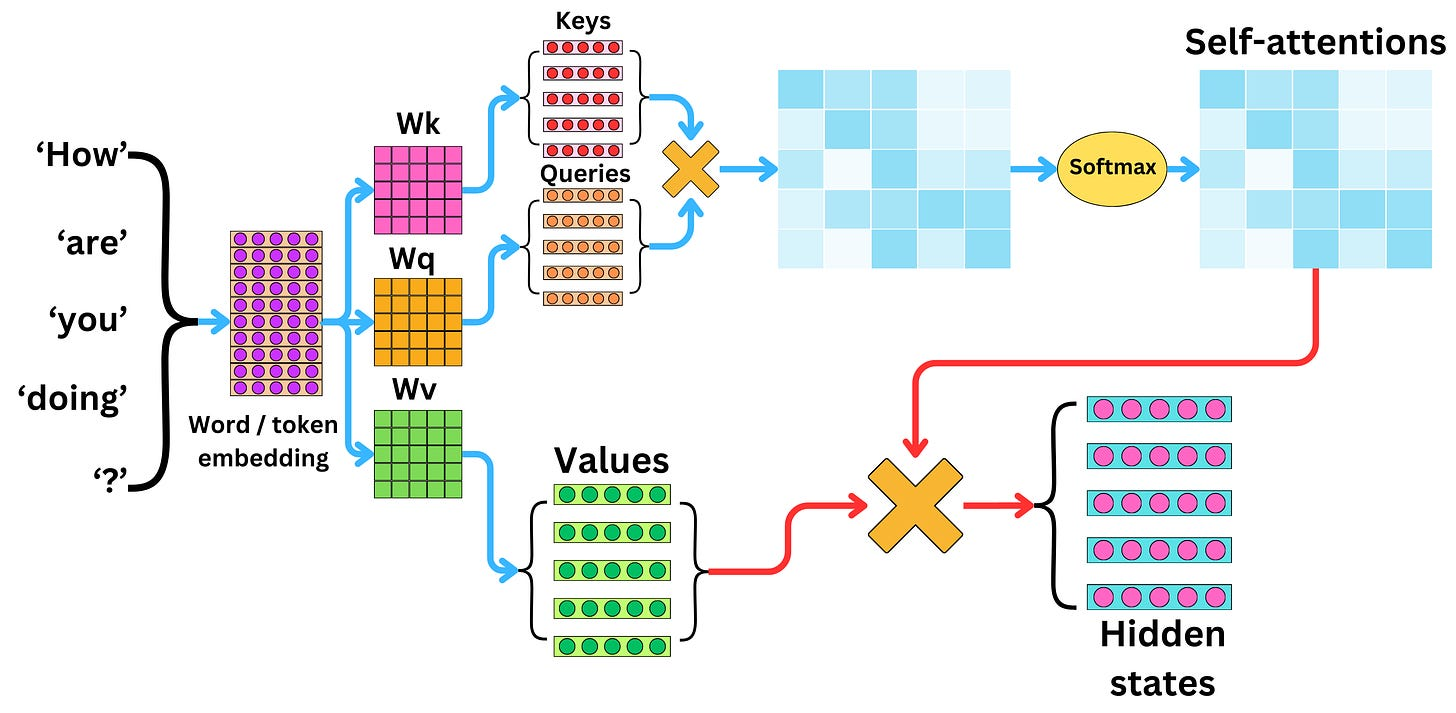

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Attention(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.Q = nn.Linear(hidden_size, hidden_size)
        self.K = nn.Linear(hidden_size, hidden_size)
        self.V = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        queries = self.Q(x)
        keys = self.K(x)
        values = self.V(x)
        scores = torch.bmm(queries, keys.transpose(1, 2))
        scores = scores / (self.hidden_size**0.5)  # normalize
        attention = F.softmax(scores, dim=2)  # map to propapility dist
        hidden_states = torch.bmm(attention, values)
        return hidden_states

In [28]:
text_corpus = "How are you doing ? I am good and you ?"
vocab = sorted(list(set(text_corpus.lower().split(" "))))
SOS_token = 0
EOS_token = 1
index2words = {SOS_token: "SOS", EOS_token: "EOS"}
for i, word in enumerate(vocab):
    index2words[i + 2] = word
words2index = {w: i for i, w in index2words.items()}
print("words2index", words2index)
print("index2words", index2words)

words2index {'SOS': 0, 'EOS': 1, '?': 2, 'am': 3, 'and': 4, 'are': 5, 'doing': 6, 'good': 7, 'how': 8, 'i': 9, 'you': 10}
index2words {0: 'SOS', 1: 'EOS', 2: '?', 3: 'am', 4: 'and', 5: 'are', 6: 'doing', 7: 'good', 8: 'how', 9: 'i', 10: 'you'}


In [29]:
def sent2tensor(sent: str):
    idxs = []
    for word in sent.lower().split(" "):
        idxs.append(words2index[word])
    return torch.tensor(idxs, dtype=torch.long).view(1, -1)

In [30]:
HIDDEN_SIZE = 5
VOCAB_SIZE = len(words2index)
emb_layer = nn.Embedding(VOCAB_SIZE, HIDDEN_SIZE)
attention = Attention(HIDDEN_SIZE)
text_num = sent2tensor("How are you")
emb_out = emb_layer(text_num)
print("\n embedding shape {} \n embedding out {}".format(emb_out.shape, emb_out))
hidden_state = attention(emb_out)
print("\n hidden shape {} \n hidden out {}".format(hidden_state.shape, hidden_state))


 embedding shape torch.Size([1, 3, 5]) 
 embedding out tensor([[[-0.2566,  0.6067,  0.7976, -0.3125,  1.2615],
         [ 0.2827,  0.2608, -1.6644, -1.3325, -0.5866],
         [-0.7621, -0.4276, -0.5427,  1.9929,  0.2064]]],
       grad_fn=<EmbeddingBackward0>)

 hidden shape torch.Size([1, 3, 5]) 
 hidden out tensor([[[-0.2524,  0.1517,  0.1587,  0.2574, -0.0491],
         [-0.1948,  0.0777,  0.1319,  0.3284, -0.0348],
         [-0.2183,  0.1121,  0.1249,  0.3142, -0.0378]]],
       grad_fn=<BmmBackward0>)
